# K Nearest Neighbors
###  Aim: To predict the class of a species based on the distance between its nearest neighbours.

### Dataset - iris
### Target Classes - Setosa and Virginica

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data =pd.read_csv("iris.csv")
data

,Sepal length,Sepal Width,Species
0,5.3,3.7,Setosa
1,5.1,3.8,Setosa
2,7.2,3.0,Virginica
3,5.4,3.4,Setosa
4,5.1,3.3,Setosa
5,7.4,2.8,Setosa
6,6.1,2.8,Virginica
7,7.3,2.9,Setosa
8,6.0,2.7,Setosa
9,5.8,2.8,Setosa


In [ ]:
x = data.iloc[:,[0,1]]
y = data.iloc[:,2]

In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=0)

In [ ]:
# Normalizing the values
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train =st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [ ]:
# Fitting the model
from sklearn.neighbors import KNeighborsClassifier
classifier =KNeighborsClassifier(n_neighbors =2, weights ="uniform",metric = "minkowski", p=2, algorithm ="auto")
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred =classifier.predict(x_test)
y_pred

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
confusion_matrix(y_test,y_pred)

array([[2, 0],
       [3, 0]])

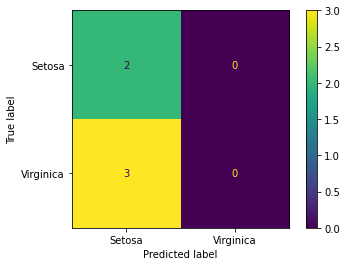

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test,y_test)

Out of the 5 test values, two of the Setosa Values were correctly predicted as Setosa and the remaining 3 of the Virginica Class were wrongly classified as Setosa.

In [ ]:

result1 = classification_report(y_test, y_pred)
print("Classification Report:\n",result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:", result2)


Classification Report:
               precision    recall  f1-score   support

      Setosa       0.40      1.00      0.57         2
   Virginica       0.00      0.00      0.00         3

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5

Accuracy: 0.4


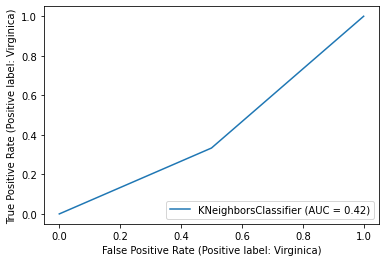

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, x_test,y_test)

As the AUC score is 0.42, we can conclude that the model is very weak in distinguishing the two classess. Higher the AUC, the better will be the model in predicting the clasess. There is a low chance that the classifier will not be able to distinguish between the two species

Out of all positive Setosa classes that have been predicted correctly by the model, 40% of  them were actually true.  Out of total positive classes of Setosa,our model was able to predict all the Setosa classes correctly. The model is able to classify the Class Setosa with an accuracy of 57%. The model is able to classify the two classes with an accuracy of 40%

# Hyper parameter Tuning
* Hyper Parameters of KNN - Number of Neighbors and p (distance Measure ).

In [ ]:
from sklearn.model_selection import GridSearchCV
n_neighbors = list(range(1,30))
p=[1,2]

hyperparameters = dict( n_neighbors=n_neighbors, p=p)

knn_2 = KNeighborsClassifier()

clf = GridSearchCV(knn_2, hyperparameters)

best_model = clf.fit(x, y)
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 2
Best n_neighbors: 7


In [ ]:
new_class =KNeighborsClassifier(n_neighbors =7, weights ="uniform",metric = "minkowski", p=2, algorithm ="auto")
new_class.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_predN =new_class.predict(x_test)
y_predN

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype=object)

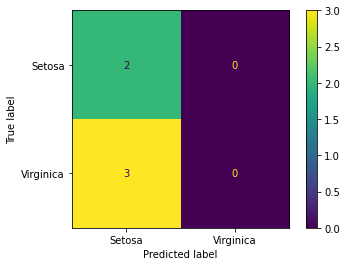

In [ ]:
plot_confusion_matrix(new_class, x_test,y_test)

In [ ]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:\n",result1)

Classification Report:
               precision    recall  f1-score   support

      Setosa       0.40      1.00      0.57         2
   Virginica       0.00      0.00      0.00         3

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



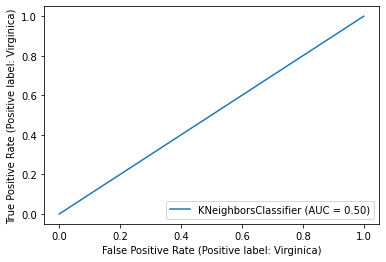

In [ ]:
plot_roc_curve(new_class, x_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
k_range = list(range(1, 10))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred2 = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred2))

scores

[0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]

Text(0, 0.5, ' Accuracy')

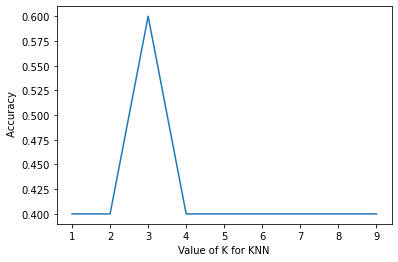

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel(' Accuracy')

In [ ]:
new_class2 =KNeighborsClassifier(n_neighbors =3, weights ="uniform",metric = "minkowski", p=2, algorithm ="auto")
new_class2.fit(x_train,y_train)
y_predN1 =new_class2.predict(x_test)
y_predN1
result2 = classification_report(y_test, y_pred)
print("Classification Report:\n",result1)

Classification Report:
               precision    recall  f1-score   support

      Setosa       0.40      1.00      0.57         2
   Virginica       0.00      0.00      0.00         3

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



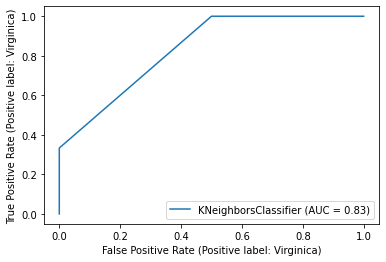

In [ ]:
plot_roc_curve(new_class2, x_test,y_test)

Conclusion:   
* The optimal number of neighbors obtained is 7 and the distance measure is Euclidean Distance. But there is no difference in the classification report before and after hyper parameter tuning. The F1 Score and Accuracy remains same. The obtained AUC Score was 50%. Which meant that for n=7, the model will be able to moderately distinguish the classes.

* Also when we tested the model for values from n= 1 to 10, for n=3, it gave the maximum accuracy, then too the F1- score remained the same but the AUC Score was 83% which means the model will be  able to distinguish between the Setosa and Virginica classes much better compared to the other two models. Thus, we can say that for n=3 would be the optimal number of neighbours for the model to distinguish between the classes.
